In [1]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

Reading both large datasets

In [2]:
Y = pd.read_csv("../data/positions_xyz_128px_full.csv", delimiter=",", decimal=".")
Y.info()
X = pd.read_csv("../data/red_ball_coordinates_128px_full.csv", delimiter=",", decimal=".")
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25357 entries, 0 to 25356
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       25357 non-null  float64
 1   y       25357 non-null  float64
 2   z       25357 non-null  float64
dtypes: float64(3)
memory usage: 594.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25357 entries, 0 to 25356
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   u0      24529 non-null  float64
 1   v0      24529 non-null  float64
 2   u1      17650 non-null  float64
 3   v1      17650 non-null  float64
 4   u2      19121 non-null  float64
 5   v2      19121 non-null  float64
 6   u3      22321 non-null  float64
 7   v3      22321 non-null  float64
 8   u4      18223 non-null  float64
 9   v4      18223 non-null  float64
 10  u5      20155 non-null  float64
 11  v5      20155 non-null  float64
 12  u6      21088 non-null  float64
 

Imputing data with KNN imputer

In [3]:
impute_knn = KNNImputer(n_neighbors=6)
X = impute_knn.fit_transform(X)

Imuting data with iterative imputer

In [4]:
#impute_it = IterativeImputer()
#X = impute_it.fit_transform(X)

Splitting data into training and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

Setting parameters for NN

In [6]:
params = {'hidden_layer_sizes': [10, 10],
          'activation': 'relu', 'solver': 'adam',
          'alpha': 0.0, 'batch_size': 10,
          'random_state': 0, 'tol': 0.0001,
          'nesterovs_momentum': False,
          'learning_rate': 'constant',
          'learning_rate_init': 0.01,
          'max_iter': 1000, 'shuffle': True,
          'n_iter_no_change': 50, 'verbose': False}

In [7]:
net = MLPRegressor(**params)

In [8]:
net.fit(X_train, y_train)

MLPRegressor(alpha=0.0, batch_size=10, hidden_layer_sizes=[10, 10],
             learning_rate_init=0.01, max_iter=1000, n_iter_no_change=50,
             nesterovs_momentum=False, random_state=0)

In [9]:
predicted = net.predict(X_test)
predicted = pd.DataFrame(predicted, columns=["x", "y", "z"])

In [10]:
predicted

,x,y,z
0,5.012876,3.806026,16.497268
1,6.674560,4.626795,8.048396
2,3.429283,3.175190,21.320947
3,2.957512,3.118944,19.949415
4,4.896333,3.742280,17.221659
...,...,...,...
8363,2.426413,3.365436,11.797920
8364,5.358508,4.236033,9.209977
8365,6.253869,4.001321,19.095439
8366,9.966482,4.870771,20.785705


In [11]:
y_test.reset_index(drop=True)

,x,y,z
0,5.259943,5.538167,16.589180
1,8.371517,1.922154,1.468246
2,3.754902,4.235989,20.924100
3,1.002142,0.272859,25.126870
4,5.817245,5.141342,13.533560
...,...,...,...
8363,1.623831,5.222513,14.224810
8364,5.759055,4.240714,5.749563
8365,6.851942,6.056138,17.986140
8366,8.675189,1.662587,13.930320


# Statistics of this model

Accuracy

In [12]:
# Calculate accuracy
#accuracy = accuracy_score(y_test.x, predicted.x)
#print("Accuracy:", accuracy)

3d scatterplot

In [13]:
y_test.shape

(8368, 3)

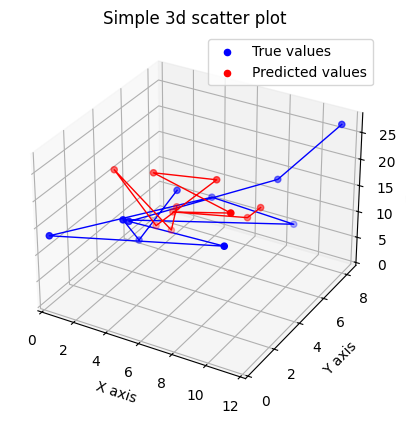

In [14]:
from utils.plot_maker import plot_maker_3d

plot_maker_3d(y_test.to_numpy()[90:101], predicted.to_numpy()[90:101], "Simple 3d scatter plot")

Measure the difference between how good the prediction is versus the actual trajectory

In [15]:
def calculate_difference_between_prediction_and_actual_values(y_test_cal, y_pred):
    diff = pd.DataFrame(columns=["x", "y", "z"])
    for i in range(len(predicted)):
        row = [0, 0, 0]
        row[0] = y_pred["x"].values[i] - y_test_cal["x"].values[i]
        row[1] = y_pred["y"].values[i] - y_test_cal["y"].values[i]
        row[2] = y_pred["z"].values[i] - y_test_cal["z"].values[i]
        diff.loc[len(diff.index)] = row
    return diff

Calculate mean deviation between actual and predict values by each axis

In [16]:
def calculate_mean_deviation_by_each_axis(diff):
    row = [0, 0, 0]
    row[0] = sum(abs(diff["x"]))/len(diff)
    row[1] = sum(abs(diff["y"]))/len(diff)
    row[2] = sum(abs(diff["z"]))/len(diff)
    dev = pd.DataFrame(columns=["x", "y", "z"])
    dev.loc[len(dev.index)] = row
    return dev

In [17]:
difference = calculate_difference_between_prediction_and_actual_values(y_test, predicted)
deviation = calculate_mean_deviation_by_each_axis(difference)
deviation

,x,y,z
0,1.929569,2.056798,3.174586
